<a href="https://colab.research.google.com/github/SherwetG/DataMiningProject/blob/main/Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mini-Project 2 - Clustering

***Edit this cell with your name(s), tutorial number(s) and ID(s)***

---

Name: Lobna ElDeeb

ID: 43-2669

Tutorial: T02

---

Name: Sherwet Galal

ID: 43-2233

Tutorial: T02

---


## Dataset Description

The dataset file contains almost ~3000 different music genres aggregated from more than 170.000 songs collected from Spotify Web API.

Primary:

- genre (Music genre)

Numerical:

- acousticness (Ranges from 0 to 1)
- danceability (Ranges from 0 to 1)
- energy (Ranges from 0 to 1)
- duration_ms (Integer typically ranging from 200k to 300k)
- instrumentalness (Ranges from 0 to 1)
- valence (Ranges from 0 to 1)
- popularity (Ranges from 0 to 100)
- tempo (Float typically ranging from 50 to 150)
- liveness (Ranges from 0 to 1)
- loudness (Float typically ranging from -60 to 0 in decibels (dB))
- speechiness (Ranges from 0 to 1)
- year (Ranges from 1921 to 2020)

Binary:

- mode (0 = Minor, 1 = Major; representing whether the track starts with a major (1) chord progression or not (0))
- explicit (0 = No explicit content, 1 = Explicit content)

Categorical:

- key (All keys on octave encoded as values ranging from 0 to 11, starting on C as 0, C# as 1 and so on…)


**Recommended Reading for Data Understanding**: Spotify's documentation of audio features: https://developer.spotify.com/documentation/web-api/reference/tracks/get-audio-features/

**Acknowledgment**: This dataset was created and published by Yamaç Eren Ay on Kaggle.

**Note**: the data URL is `https://raw.githubusercontent.com/GUC-DM/W2020/main/data/music_genres.csv`

## **Loading the dataset**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use('fivethirtyeight')
sns.set_style('whitegrid')

In [ ]:
try:
    df = pd.read_csv('../data/music_genres.csv')
except:
    df = pd.read_csv('https://raw.githubusercontent.com/GUC-DM/W2020/main/data/music_genres.csv')
df.head()

,mode,genres,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
0,1,21st century classical,0.979333,0.162883,1.602977e+05,0.071317,0.606834,0.361600,-31.514333,0.040567,75.336500,0.103783,27.833333,6
1,1,432hz,0.494780,0.299333,1.048887e+06,0.450678,0.477762,0.131000,-16.854000,0.076817,120.285667,0.221750,52.500000,5
2,1,8-bit,0.762000,0.712000,1.151770e+05,0.818000,0.876000,0.126000,-9.180000,0.047000,133.444000,0.975000,48.000000,7
3,1,[],0.651417,0.529093,2.328809e+05,0.419146,0.205309,0.218696,-12.288965,0.107872,112.857352,0.513604,20.859882,7
4,1,a cappella,0.676557,0.538961,1.906285e+05,0.316434,0.003003,0.172254,-12.479387,0.082851,112.110362,0.448249,45.820071,7


## **Checking for any detected missing values**

In [ ]:
df.isnull().any().any()

False

## **Queries**

###**What are the 20 most danceable music genres?**

In [ ]:
df.sort_values('danceability',ascending=False)['genres'].head(20)

1012          experimental house
1238                  guam indie
917                dutch hip hop
924                dutch rap pop
364     british children's music
1358            indie deutschrap
2743             trance mexicano
1072                    footwork
1119               funk paulista
2244                   proto-rap
2684              tamaulipas rap
756               danish hip hop
46               alberta hip hop
2449          serbian electronic
693          corridos cristianos
2755             trap venezolano
140        atmospheric post-rock
2969                     zouglou
1769                  miami bass
734           cumbia santafesina
Name: genres, dtype: object

###**What are the 20 lowest energy music genres?**

In [ ]:
df.sort_values('energy',ascending=True)['genres'].head(20)

328                          brain waves
283                             binaural
1611              korean classical piano
2476                        singing bowl
1723                            medieval
1441            italian classical guitar
1895           native american spiritual
473            caucasian classical piano
150                   australian ambient
912                dutch classical piano
207               balkan classical piano
279                                bible
210                     baltic classical
327                          boy soprano
152                     australian choir
1184                ghanaian traditional
2913                          warm drone
678                   contemporary choir
72       american 21st century classical
1325    hungarian contemporary classical
Name: genres, dtype: object

###**What are the 20 loudest music genres?**

In [ ]:
df.sort_values('loudness',ascending=False)['genres'].head(20)

1897     nederlandse hardstyle
18                 action rock
1747             memphis indie
2107           palestinian pop
1777       middle east hip hop
105             arabic hip hop
1510        japanese metalcore
286         birmingham hip hop
1473                    j-idol
1505       japanese indie rock
1514    japanese post-hardcore
2038               nz hardcore
2041                   nz punk
256             belarusian pop
257            belarusian rock
2953                  xtra raw
2003       norwegian punk rock
1583              kawaii metal
49                    alt-idol
2383             russian dance
Name: genres, dtype: object

###**What are the 20 music genres most commonly performed live?**

In [ ]:
df.sort_values('liveness',ascending=False)['genres'].head(20)

1826              modular synth
1246             gujarati garba
2743            trance mexicano
1784                mindfulness
284                    birdsong
1931                 new comedy
797                 deep comedy
185                    autoharp
656                clean comedy
141          atmospheric sludge
139      atmospheric post-metal
920                  dutch jazz
1864           musica paraibana
1410                irish banjo
2924    west australian hip hop
1223                greek house
2079         organic electronic
1469                 j-acoustic
597       classic icelandic pop
2785               turkish trap
Name: genres, dtype: object

###**What are the 20 most popular music genres?**

In [ ]:
df.sort_values('popularity',ascending=False)['genres'].head(20)

237                basshall
2778            turkish edm
2533    south african house
2755        trap venezolano
46          alberta hip hop
536      chinese electropop
37                afroswing
31                afro soul
2383          russian dance
1239               guaracha
1381           indie triste
575                 circuit
2800            uk diy punk
2102          pagode baiano
2337          ritmo kombina
2754            trap triste
2002      norwegian pop rap
2834         urbano espanol
1850         musica canaria
110       argentine hip hop
Name: genres, dtype: object

##**Clustering**

The features were selected via trial-and-error.
The following features were removed for the following reasons:
1. Tempo: it's a feature in danceability
2. Loudness: it's a feature in energy
3. Key: Categorical values (int range  is too small)
4. Duration_ms: Not relevant
5. Mode: Binary values

The rest of the attributes were removed after trial-and-error.


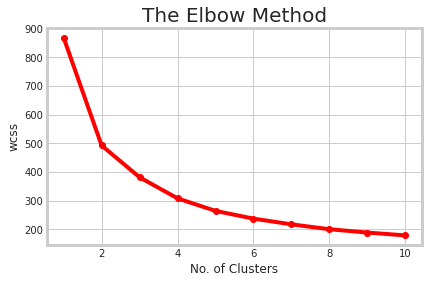

In [ ]:
cdf = df[['acousticness','valence','danceability','energy','instrumentalness']].copy()
from sklearn.cluster import KMeans

# We try out different number of clusters incrementally
# From 1 till 10
# 10 was chosen as the upper limit since there doesn't seem to be many clusters present in the data
# as per the pairplot
wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    km.fit(cdf)
    wcss.append(km.inertia_)
    
plt.plot(range(1, 11), wcss, marker='o', color='red')
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

We decided to use 7 clusters, as it has provided more meaningful clusters than the elbow method's suggestions (4-6). 

In [ ]:
km = KMeans(n_clusters=7, init='k-means++', max_iter=300, n_init=10, random_state=0)
km.fit(cdf)
cluster_labels = km.fit_predict(cdf)

cdf["cluster"] = cluster_labels
labels = km.labels_


Here we provide a visual representation of the clusters to determine whether they are properly clustered or not.

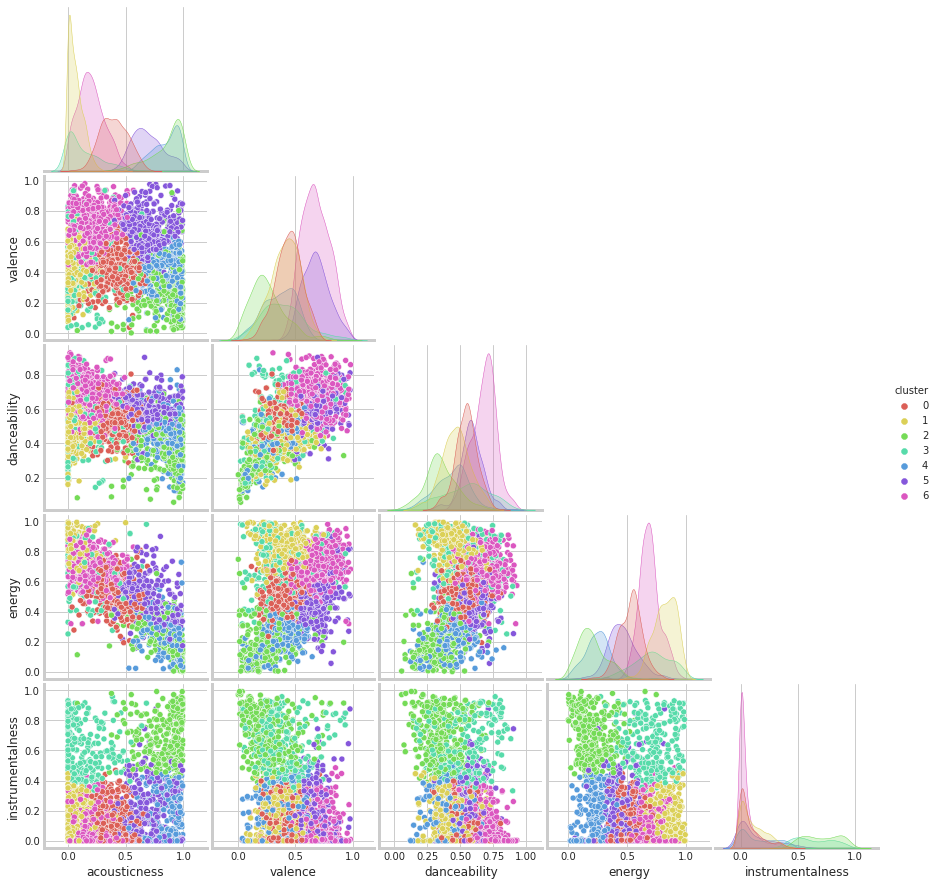

In [ ]:
sns.pairplot(cdf, hue='cluster', palette=sns.color_palette('hls', 7), corner=True)

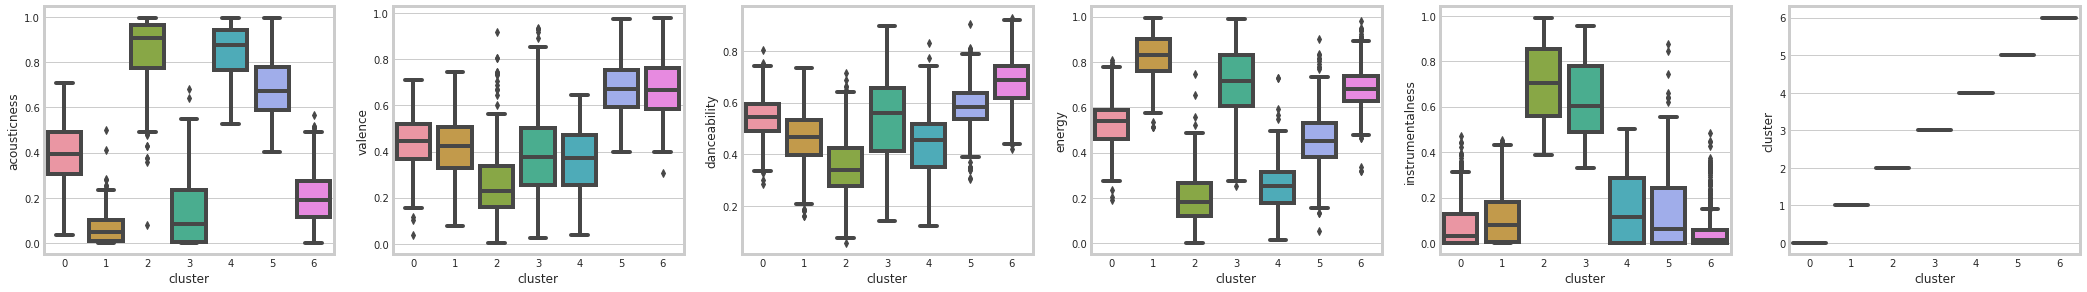

In [ ]:
cols = cdf.select_dtypes('number')
n = int(len(cols)**(1/2))

plt.figure(figsize=(300,300))
for i, col in enumerate(cols, 1):
    plt.subplot(n+1, n, i)
    sns.boxplot(x='cluster', y=col, data=cdf)

##**Checking the clusters**

In [ ]:
rdf = df.copy()
rdf['cluster'] = labels

Here we check the number of elements in each cluster.

In [ ]:
rdf['cluster'].value_counts()

6    739
1    503
0    461
5    382
2    330
4    294
3    264
Name: cluster, dtype: int64

Here we select samples from each cluster to make sure that the genres make sense to be grouped together.

In [ ]:
rdf[rdf['cluster']==0].sample(10)['genres']

650        classical saxophone
1748              memphis soul
568           christian uplift
2651          swedish synthpop
1511         japanese new wave
2652    swedish tropical house
2354             rock nacional
1831           monterrey indie
630        classical accordion
453           cancion melodica
Name: genres, dtype: object

In [ ]:
rdf[rdf['cluster']==1].sample(10)['genres']

1663            liquid funk
1479                 j-punk
1899    neo classical metal
320             boston rock
2151         plunderphonics
2656          swing revival
40            alabama metal
66            ambient house
18              action rock
745               dakke dak
Name: genres, dtype: object

In [ ]:
rdf[rdf['cluster']==2].sample(10)['genres']

181         austrian orchestra
753           danish classical
2048        oceania soundtrack
1084            french baroque
1336    icelandic experimental
1010       experimental guitar
1329            hungarian rock
401     bulgarian experimental
283                   binaural
379          british orchestra
Name: genres, dtype: object

In [ ]:
rdf[rdf['cluster']==3].sample(10)['genres']

1682    louisville underground
2449        serbian electronic
2591               stoner rock
961         electro-industrial
1390       industrial hardcore
1963                     ninja
1339            icelandic jazz
887               dream trance
907              dungeon synth
988                essex indie
Name: genres, dtype: object

In [ ]:
rdf[rdf['cluster']==4].sample(10)['genres']

1425          isle of wight indie
2959                         yoik
79      american modern classical
1103           french romanticism
458        canto popular uruguayo
866                       dhrupad
933          early music ensemble
1692           magyar alternative
652               classical tenor
1864             musica paraibana
Name: genres, dtype: object

In [ ]:
rdf[rdf['cluster']==5].sample(10)['genres']

708                cowboy western
2691                tango cancion
1433    israeli singer-songwriter
2154                 polish blues
1679              louisiana blues
220                         banjo
2796         uk contemporary jazz
456                cante flamenco
618           classic russian pop
1067             folklore peruano
Name: genres, dtype: object

In [ ]:
rdf[rdf['cluster']==6].sample(10)['genres']

2305    rap underground mexicano
2927             west coast trap
1467                 italo dance
2194                     popgaze
1429             israeli hip hop
1592              kentucky roots
577             classic afrobeat
2447                 second line
705                 country road
1489           japanese city pop
Name: genres, dtype: object

## **Bonus**

In [ ]:

def genre_recommender(s):
  i=rdf[rdf['genres']==s]['cluster'].item()
 
  #pd.to_numeric(i)
  return rdf[rdf['cluster']==i]['genres'].sample(5).tolist()

In [ ]:
genre_recommender('jazz')

['haitian traditional',
 'clawhammer banjo',
 'french contemporary classical',
 'canadian folk',
 'victorian britain']